In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
###### Day 2 Activity 5
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [60]:
# View all of the classes that automap found
###### Day 2 Activity 5
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
###### Day 2 Activity 5
measurement = Base.classes.measurement
station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
###### Day 2 Activity 5
session = Session(engine)

# Display the row's columns and data in dictionary format

first_row = session.query(measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b787ffc760>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1}

In [63]:
###### Day 2 Activity 2 Explore Database

inspector = inspect(engine)
inspector.get_table_names()  


['measurement', 'station']

In [64]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [65]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [66]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [67]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [68]:
#  Reflect and query dates
# Find the most recent date in the data set.
###### Day 3 Activity 2 (there are other ways, but this example is very specific)
# Latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
###### you can just look at the data to get this point OR use python to find it
last_12_months = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(last_12_months)

# Calculate the date one year from the last date in data set.
###### This is also found in the data lecture #Day 3 Activity 2
###### Look for the code using timedelta


# Perform a query to retrieve the data and precipitation scores
###### you can do this with session.query and .filter or with execute(SQL)
prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_12_months, measurement.prcp != None).\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
###### you can use pd.read_sql.  If you choose to use .filter you will need to pd.DataFrame()
df = pd.DataFrame(prcp, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
###### this is found throughout, but Day 3 Activity 3 has a specific example
df.set_index('Date', inplace=True)
df.head()





2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


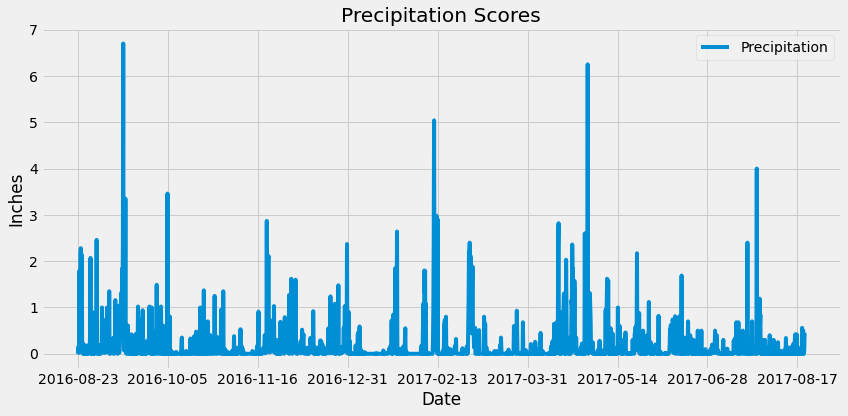

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
# ######Day 3 Activity 3 has a specific example
df.plot(figsize=(12,6))
plt.title("Precipitation Scores")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig('Images/Prcp.png')


In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
###### Pandas Day 1 Activity 4
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number stations in the dataset
#####  You can use session.query() or just plain SQL for this.

session.query(measurement.station).group_by(measurement.station).count()


9

In [73]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#####  You can use session.query() or just plain SQL for this.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#####  You can use session.query() or just plain SQL for this.

lowest_t = session.query(func.min(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
highest_t = session.query(func.max(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
average_t = session.query(func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()

set = (lowest_t, highest_t, average_t)
set


([(54.0,)], [(85.0,)], [(71.66378066378067,)])

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#####  You can use session.query() or just plain SQL for this.
#####  The plot is similar to the one above
year_temperature = session.query(measurement.tobs).\
      filter(measurement.date >= last_12_months, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()

df_t = pd.DataFrame(year_temperature, columns=['tobs'])
df_t.head()


,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


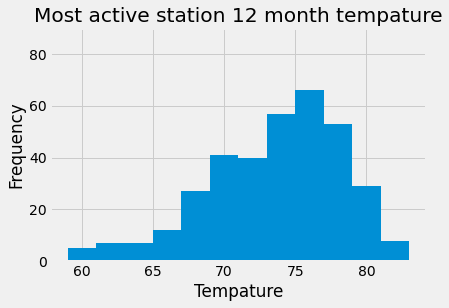

In [76]:
bins = 12
df_t.hist(bins = 12)
plt.title("Most active station 12 month tempature")
plt.xlabel("Tempature")
plt.ylabel('Frequency')
plt.ylim(0,90)
plt.savefig('Images/station-histogram.png')


# Close session

In [77]:
# Close Session
session.close()